# Q3. Regression

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def target_f1(x, sigma_true=0.3):
    noise = np.random.randn(*x.shape)
    
    return (2 * x + sigma_true * noise).ravel()

In [5]:
def norm(a: float):
    return (a * a) ** 0.5

def element_wise_norm(x: np.ndarray):
    shape = x.shape
    
    return np.array([norm(el) for el in x.ravel()]).reshape(shape)
  
def element_wise_sin(x: np.ndarray):
    shape = x.shape
    
    return np.sin(x.ravel()).reshape(shape)


In [6]:
def target_f2(x: np.ndarray):
    noise = np.random.randn(*x.shape)
    y = 2 * x + element_wise_norm(x) * 0.3 * noise
    
    return y.ravel()

In [7]:
def target_f3(x):
    noise = np.random.randn(*x.shape)
    y = 2 * x + 5 * element_wise_sin(x * 0.5) + element_wise_norm(x) * 0.3 * noise
    
    return y.ravel()

## Sample data from the target functions 

In [8]:
def sample_batch(target_f, batch_size):
    x = np.array([[np.random.uniform(0, 20) for _ in range(batch_size)]])
    y = target_f(x)
    return x, y

## Test assumptions about your dimensions

In [9]:
n = 200
m = 1

for target_f in [target_f1, target_f2, target_f3]:
    x, y = sample_batch(target_f, n)
    assert x.shape == (m, n)
    assert y.shape == (n,)

print('Yaay!')

Yaay!


## Plot the target functions

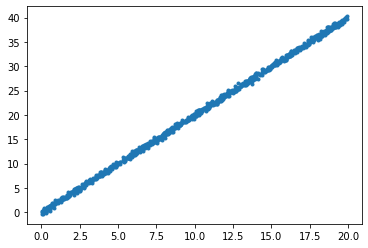

In [10]:
x, y = sample_batch(target_f1, 1000)

plt.plot(x[0], y, '.');

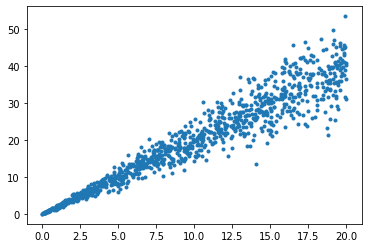

In [11]:
x, y = sample_batch(target_f2, 1000)

plt.plot(x[0], y, '.');

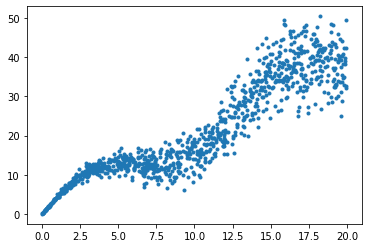

In [12]:
x, y = sample_batch(target_f3, 1000)

plt.plot(x[0], y, '.');

## Linear regression model with $\hat{\beta}$ MLE

In [13]:
from numpy.linalg import inv

def beta_mle(X, y):
    beta = inv(X.dot(X.T)) @ X @ y
    
    return beta

In [14]:
n = 1000

print(beta_mle(*sample_batch(target_f1, n)))

[1.99979302]


In [15]:
n = 1000

print(beta_mle(*sample_batch(target_f2, n)))

[1.99953062]


In [16]:
n = 1000

print(beta_mle(*sample_batch(target_f3, n)))

[2.05287984]


## Plot the MLE linear regression model

In [87]:
n = 200
X, y = sample_batch(target_f1, n)
beta_hat = beta_mle(X, y)
y_hat = (X.T @ beta_hat).ravel()

In [88]:
def sort_data(X, y, y_hat):
    """
    Due to the problem I had with shading I had to sort the data first and then
    plot the results...
    """
    order = np.argsort(X)

    return X[order], y[order], y_hat[order]

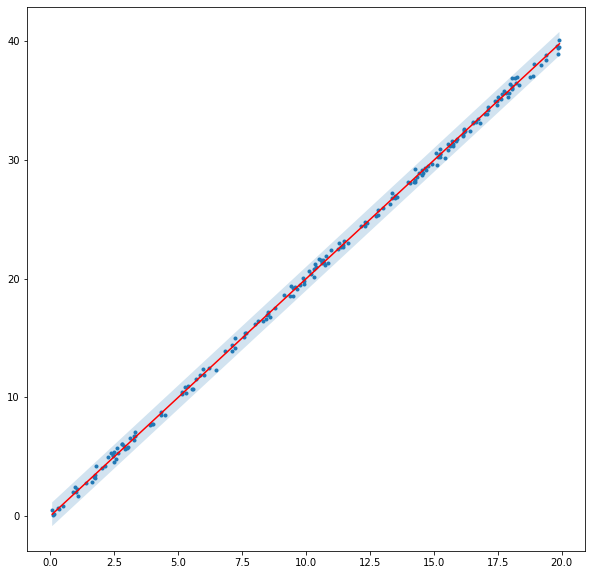

In [89]:
X_sorted, y_sorted, y_hat_sorted = sort_data(X[0], y, y_hat)
plt.figure(figsize=(10, 10))
plt.plot(X_sorted, y_sorted, '.');
plt.plot(X_sorted, y_hat_sorted, 'r');
uncertainty = [1.] * len(y_hat_sorted)
plt.fill_between(X_sorted, y_hat_sorted-uncertainty, y_hat_sorted+uncertainty, alpha=0.2);

In [90]:
n = 200
X, y = sample_batch(target_f2, n)
beta_hat = beta_mle(X, y)
y_hat = (X.T @ beta_hat).ravel()

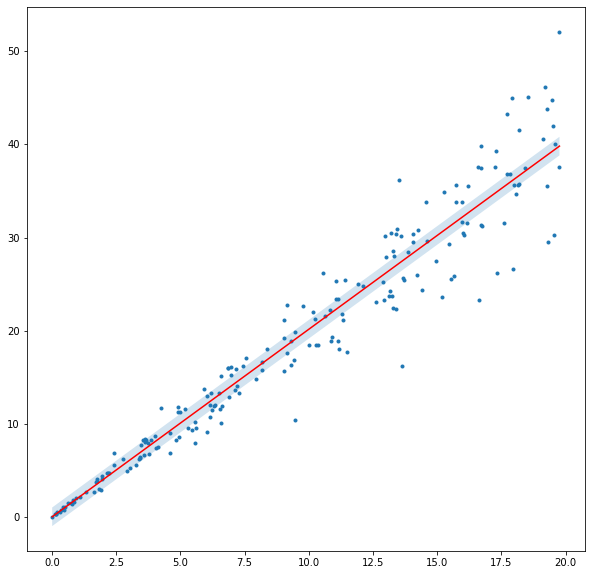

In [91]:
X_sorted, y_sorted, y_hat_sorted = sort_data(X[0], y, y_hat)
plt.figure(figsize=(10, 10))
plt.plot(X_sorted, y_sorted, '.');
plt.plot(X_sorted, y_hat_sorted, 'r');
uncertainty = [1.] * len(y_hat_sorted)
plt.fill_between(X_sorted, y_hat_sorted-uncertainty, y_hat_sorted+uncertainty, alpha=0.2);

In [92]:
n = 200
X, y = sample_batch(target_f3, n)
beta_hat = beta_mle(X, y)
y_hat = (X.T @ beta_hat).ravel()

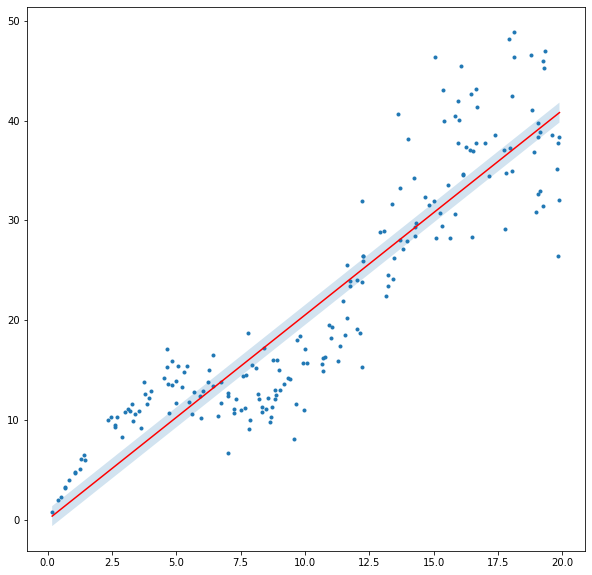

In [93]:
X_sorted, y_sorted, y_hat_sorted = sort_data(X[0], y, y_hat)
plt.figure(figsize=(10, 10))
plt.plot(X_sorted, y_sorted, '.');
plt.plot(X_sorted, y_hat_sorted, 'r');
uncertainty = [1.] * len(y_hat_sorted)
plt.fill_between(X_sorted, y_hat_sorted-uncertainty, y_hat_sorted+uncertainty, alpha=0.2);

## Log-likelihood of Data under Model

In [ ]:
from math import pi

def gaussian_log_likelihood(mu: np.ndarray, sigma: np.ndarray, X: np.ndarray):
    d = x.shape
    return -d/2 * np.log(2 * pi) - np.sum(np.log(sigma)) - 1/2 * np.sum(((x - mu) / simga) ** 2)